In [16]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
og_df = pd.read_csv('E:\\STUDY\\Final Year Project\\GWEAP\\Datasets\\Unfiltered\\weather datasets\\countries\\United Kingdom.csv')
og_df = og_df.drop("Country", axis=1)
og_df.drop(og_df.filter(regex="Unname"), axis=1, inplace=True)
fullDf = og_df.copy()
og_df = og_df.head(10)
og_df

,dt,AverageTemperature
0,1743-11-01,7.086
1,1743-12-01,NaN
2,1744-01-01,NaN
3,1744-02-01,NaN
4,1744-03-01,NaN
5,1744-04-01,7.619
6,1744-05-01,9.339
7,1744-06-01,12.379
8,1744-07-01,13.499
9,1744-08-01,NaN


In [18]:
og_df.iloc[0]["AverageTemperature"]

7.086

In [19]:
# Generate Random NaNs in the dataframe
df = og_df.copy()
ix = [(row, 1) for row in range(df.shape[0]) for col in range(df.shape[1])]
for row, col in random.sample(ix, int(round(0.2*len(ix)))):
    df.iat[row, 1] = np.nan
df

,dt,AverageTemperature
0,1743-11-01,7.086
1,1743-12-01,NaN
2,1744-01-01,NaN
3,1744-02-01,NaN
4,1744-03-01,NaN
5,1744-04-01,7.619
6,1744-05-01,NaN
7,1744-06-01,NaN
8,1744-07-01,13.499
9,1744-08-01,NaN


In [20]:
# Filling method
newdf = df.interpolate()
if newdf["AverageTemperature"].isnull().values.any():
    newdf = newdf.fillna(method='bfill')
newdf

,dt,AverageTemperature
0,1743-11-01,7.0860
1,1743-12-01,7.1926
2,1744-01-01,7.2992
3,1744-02-01,7.4058
4,1744-03-01,7.5124
5,1744-04-01,7.6190
6,1744-05-01,9.5790
7,1744-06-01,11.5390
8,1744-07-01,13.4990
9,1744-08-01,13.4990


In [21]:
newset2 = df.fillna(method='ffill')
if newset2["AverageTemperature"].isnull().values.any():
    newset2 = newset2.fillna(method='bfill')
newset2

,dt,AverageTemperature
0,1743-11-01,7.086
1,1743-12-01,7.086
2,1744-01-01,7.086
3,1744-02-01,7.086
4,1744-03-01,7.086
5,1744-04-01,7.619
6,1744-05-01,7.619
7,1744-06-01,7.619
8,1744-07-01,13.499
9,1744-08-01,13.499


In [22]:
newset3 = df.fillna(method='bfill')
if newset3["AverageTemperature"].isnull().values.any():
    newset3 = newset3.fillna(method='ffill')
newset3

,dt,AverageTemperature
0,1743-11-01,7.086
1,1743-12-01,7.619
2,1744-01-01,7.619
3,1744-02-01,7.619
4,1744-03-01,7.619
5,1744-04-01,7.619
6,1744-05-01,13.499
7,1744-06-01,13.499
8,1744-07-01,13.499
9,1744-08-01,13.499


In [23]:
# Mean
meanFill = df.fillna(value=df["AverageTemperature"].mean())
meanFill

,dt,AverageTemperature
0,1743-11-01,7.086000
1,1743-12-01,9.401333
2,1744-01-01,9.401333
3,1744-02-01,9.401333
4,1744-03-01,9.401333
5,1744-04-01,7.619000
6,1744-05-01,9.401333
7,1744-06-01,9.401333
8,1744-07-01,13.499000
9,1744-08-01,9.401333


In [24]:
# Median
medianFill = df.fillna(value=df["AverageTemperature"].median())
medianFill

,dt,AverageTemperature
0,1743-11-01,7.086
1,1743-12-01,7.619
2,1744-01-01,7.619
3,1744-02-01,7.619
4,1744-03-01,7.619
5,1744-04-01,7.619
6,1744-05-01,7.619
7,1744-06-01,7.619
8,1744-07-01,13.499
9,1744-08-01,7.619


In [25]:
# Mode
modeFill = df.fillna(value=df["AverageTemperature"].mode()[0])
modeFill

,dt,AverageTemperature
0,1743-11-01,7.086
1,1743-12-01,7.086
2,1744-01-01,7.086
3,1744-02-01,7.086
4,1744-03-01,7.086
5,1744-04-01,7.619
6,1744-05-01,7.086
7,1744-06-01,7.086
8,1744-07-01,13.499
9,1744-08-01,7.086


In [26]:
# Euclidean Distance
def Euclidean_Dist(df1, df2, cols="AverageTemperature"):
    return np.linalg.norm(df1[cols].values - df2[cols].values)
data = {
    "Linear Interpolation": round(Euclidean_Dist(og_df, newdf), 3),
    "Forward Fill": round(Euclidean_Dist(og_df, newset2), 3),
    "Backward Fill": round(Euclidean_Dist(og_df, newset3), 3),
    "Mean": round(Euclidean_Dist(og_df, meanFill), 3),
    "Median": round(Euclidean_Dist(og_df, medianFill), 3),
    "Mode": round(Euclidean_Dist(og_df, modeFill), 3)
}

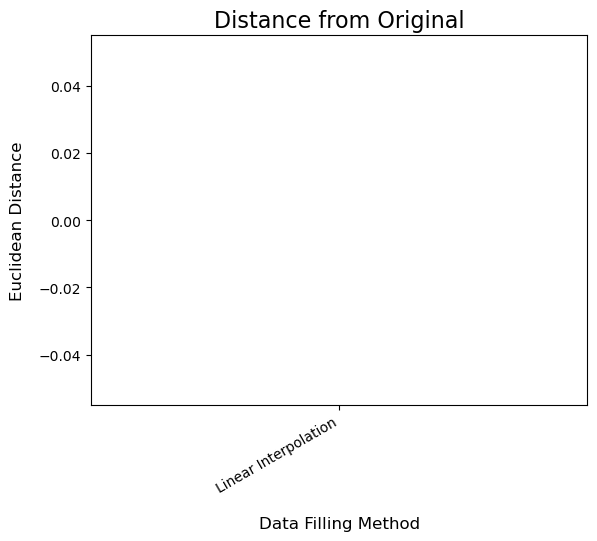

In [27]:
x = list(data.keys())
y = list(data.values())
plt.xlabel('Data Filling Method', labelpad=15, fontdict={'size': 12})
plt.ylabel('Euclidean Distance', labelpad=10, fontdict={'size': 12})
plt.title('Distance from Original', fontdict={'fontsize': 16})
ax = plt.subplot()
plt.bar(x, y)
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
plt.show()

In [28]:
# Filling whole dataset using linear interpolation
fullDf = fullDf.interpolate()
if fullDf["AverageTemperature"].isnull().values.any():
    fullDf = fullDf.fillna(method='bfill')
fullDf

,dt,AverageTemperature
0,1743-11-01,7.0860
1,1743-12-01,7.1926
2,1744-01-01,7.2992
3,1744-02-01,7.4058
4,1744-03-01,7.5124
...,...,...
3234,2013-05-01,9.6050
3235,2013-06-01,12.8260
3236,2013-07-01,16.2600
3237,2013-08-01,15.0220


In [29]:
fullDf["AverageTemperature"] = fullDf["AverageTemperature"].round(decimals=3)
fullDf.head(10)

,dt,AverageTemperature
0,1743-11-01,7.086
1,1743-12-01,7.193
2,1744-01-01,7.299
3,1744-02-01,7.406
4,1744-03-01,7.512
5,1744-04-01,7.619
6,1744-05-01,9.339
7,1744-06-01,12.379
8,1744-07-01,13.499
9,1744-08-01,12.334


In [30]:
# converting string to datetime
fullDf["date"] = pd.to_datetime(fullDf["dt"])
fullDf.drop("dt", axis=1, inplace=True)
fullDf.to_csv('../../Processed Datasets/uk.csv', sep=',', index=False)
fullDf.set_index("date", inplace=True)
fullDf = fullDf['1970':'2012']
fullDf.head()

,AverageTemperature
date,
1970-01-01,3.863
1970-02-01,3.043
1970-03-01,3.904
1970-04-01,5.930
1970-05-01,11.126


In [31]:
df1 = fullDf.copy()
df1.columns = ["avgTemp"]
df1.head()
# df1 = pd.DataFrame()
# years = []
# for i in range(len(fullDf)):
#     years.append(fullDf.iloc[i]["dt"].year)
# years = list(set(years))

,avgTemp
date,
1970-01-01,3.863
1970-02-01,3.043
1970-03-01,3.904
1970-04-01,5.930
1970-05-01,11.126


In [32]:
df1.describe()

,avgTemp
count,516.000000
mean,9.062829
std,3.843923
min,0.202000
25%,5.851000
50%,8.562500
75%,12.631750
max,17.285000


<AxesSubplot:xlabel='date'>

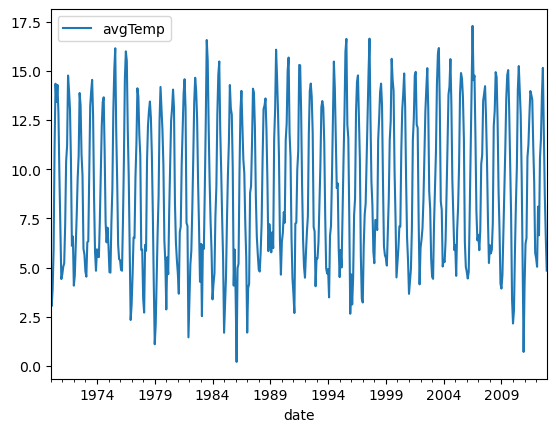

In [33]:
df1.plot()

# Testing for Stationarity:
### 1. Augmented Dickey-Fuller test:
#### Null Hypothesis: Series is not stationary.
#### Alternate Hypothesis: Series is stationary.

In [34]:
from statsmodels.tsa.stattools import adfuller


In [35]:
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic','p-value','No. of Lags Used',
                                             'Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
adf_test(df1["avgTemp"])

Results of Dickey-Fuller Test:
Test Statistic                  -3.916458
p-value                          0.001917
No. of Lags Used                19.000000
Number of Observations Used    496.000000
Critical Value (1%)             -3.443603
Critical Value (5%)             -2.867385
Critical Value (10%)            -2.569883
dtype: float64


#### The p-value is lesser than the level of significance (0.05) and hence it is strong evidence against the null hypothesis and therefore we reject the null hypothesis. This indicates that our time series data is stationary.

### 2. KPSS (Kwiatkowski-Phillips-Schmidt-Shin) Test
#### Null Hypothesis: Series is stationary.
#### Alternate Hypothesis: Series is not stationary.

In [36]:
from statsmodels.tsa.stattools import kpss

def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression = 'c', nlags = 'legacy')
    kpss_output = pd.Series(kpsstest[0:3], index = ['Test Statistic','p-value','No. of Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
kpss_test(df1["avgTemp"])

Results of KPSS Test:
Test Statistic            0.541672
p-value                   0.032281
No. of Lags Used         19.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [37]:
y = df1['avgTemp'].resample('MS').mean()
y.head()

date
1970-01-01     3.863
1970-02-01     3.043
1970-03-01     3.904
1970-04-01     5.930
1970-05-01    11.126
Freq: MS, Name: avgTemp, dtype: float64

#### The p-value is greater than the level of significance (0.05) and hence it is weak evidence against the null hypothesis and therefore we fail to reject the null hypothesis. This indicates that our time series is stationary.

# Both ADF and KPSS tests are in agreement that the time series data is stationary.


In [38]:
train = y[:'2009']
test = y['2010':]

In [39]:
# from pmdarima.arima import auto_arima

# #The default values of several important parameters for auto_arima function are as follows:
# #max_p=5, max_d=2, max_q=5, max_P=2, max_D=1, max_Q=2

# arima_model = auto_arima(train, seasonal = True, m = 12, stepwise = False, trace = 1, random_state = 10)

 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2655.702, Time=0.04 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=2266.120, Time=0.21 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=2109.110, Time=0.58 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=1499.248, Time=0.95 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=1507.227, Time=2.33 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=inf, Time=2.56 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.33 sec
 ARIMA(0,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=3.12 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=2278.185, Time=0.10 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2049.982, Time=0.28 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=1951.409, Time=0.76 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=1683.419, Time=0.62 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=1477.439, Time=0.98 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=1496.152, Time=2.62 sec
 ARIMA(0,0,1)(2

In [40]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(train, order = (2, 0, 0), seasonal_order = (1, 0, 1, 12), 
                                  enforce_stationarity = False, enforce_invertibility = False)
fitted_model = model.fit(maxiter = 200, method = 'nm')
print(fitted_model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                              avgTemp   No. Observations:                  480
Model:             SARIMAX(2, 0, 0)x(1, 0, [1], 12)   Log Likelihood                -718.585
Date:                              Sat, 06 May 2023   AIC                           1447.170
Time:                                      13:25:29   BIC                           1467.890
Sample:                                  01-01-1970   HQIC                          1455.325
                                       - 12-01-2009                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2072      0.047      4.386      0.000       0.115       0.300
ar.L2         -0.00

d:\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


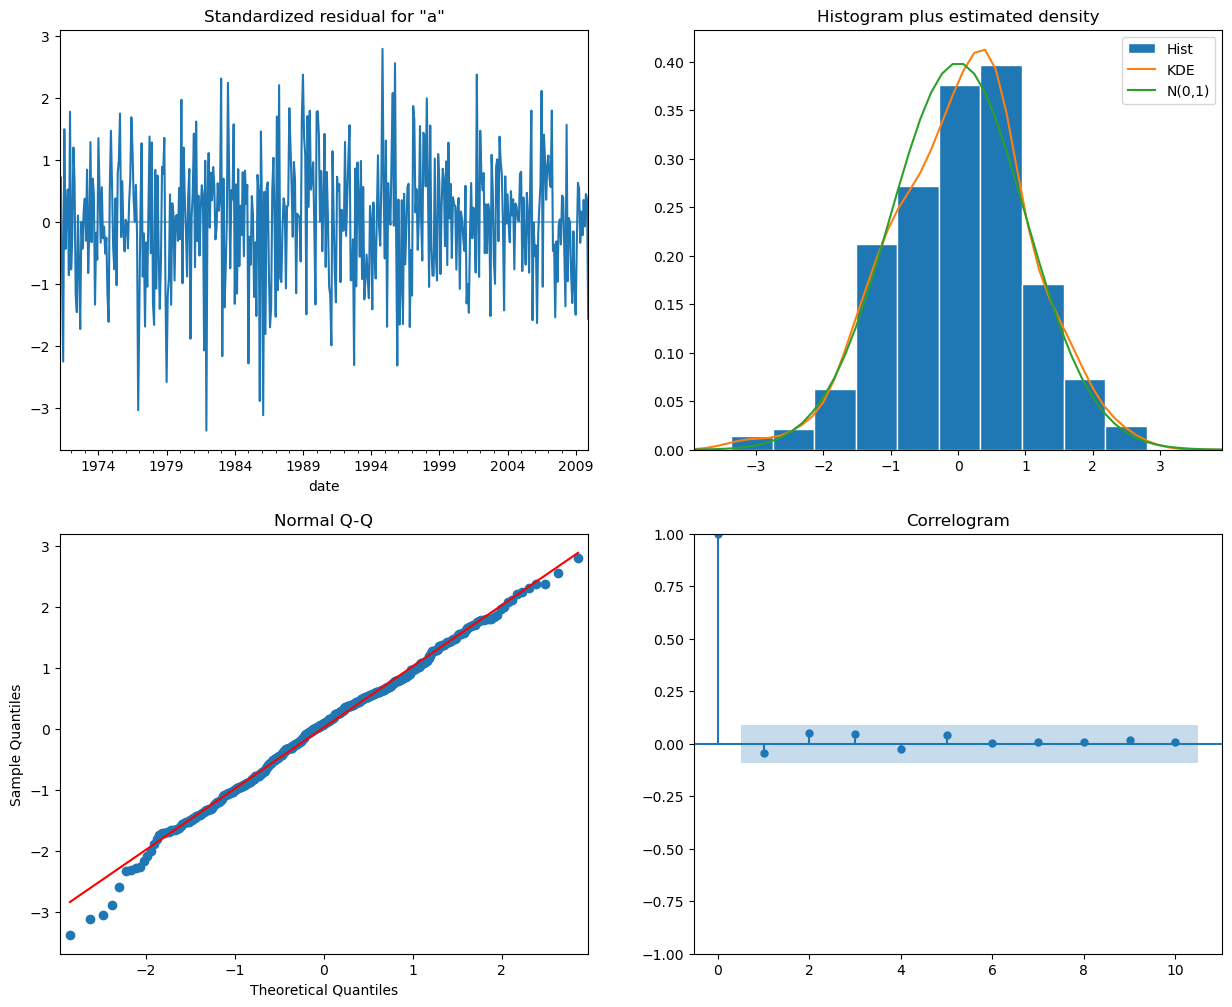

In [41]:
fitted_model.plot_diagnostics(figsize = (15, 12))
plt.show()

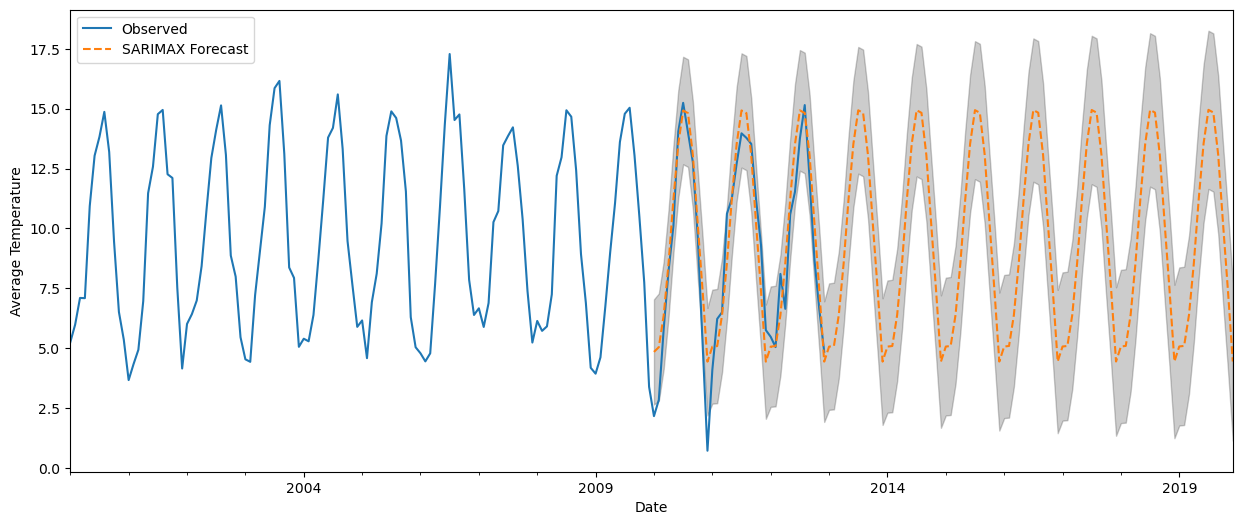

In [42]:
#Getting the SARIMAX forecast with number of steps as 36 since we want to make 3 year prediction and our data is monthly sampled.
pred = fitted_model.get_forecast(steps = 120)
#Plotting the observed and forecasted values:
ax1 = y['2000':].plot(label = 'Observed')
pred.predicted_mean.plot(ax = ax1, label = 'SARIMAX Forecast', figsize = (15, 6), linestyle = 'dashed')
#Finding the confidence intervals of the forecasts.
pred_ci = pred.conf_int()
ax1.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Temperature')
plt.legend(loc = 'upper left')
plt.show()

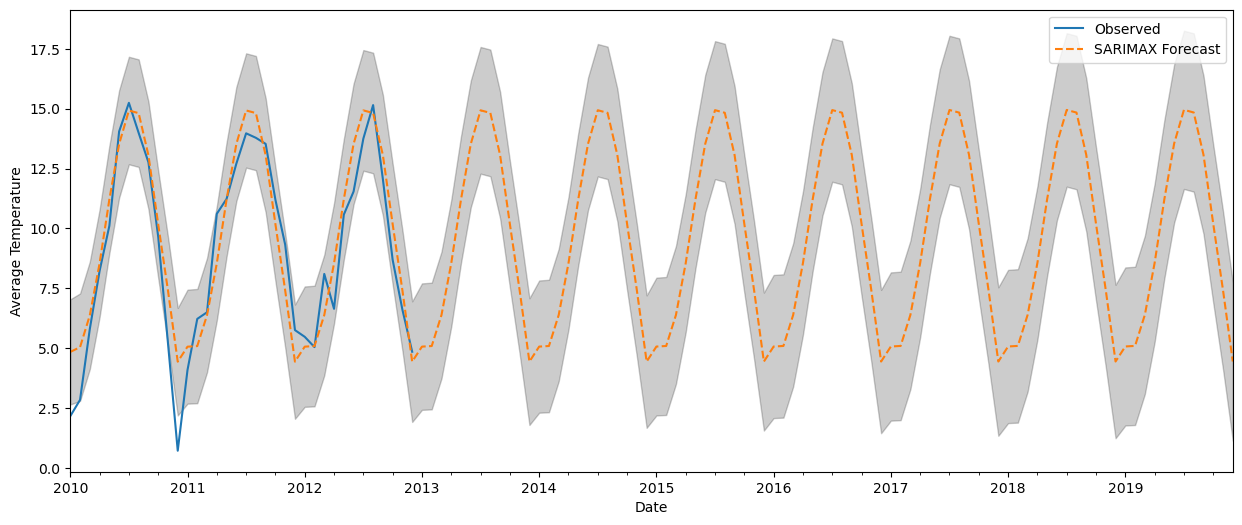

In [43]:
#Plotting the observed and forecasted values:
ax2 = y['2010':].plot(label = 'Observed')
pred.predicted_mean.plot(ax = ax2, label = 'SARIMAX Forecast', figsize = (15, 6), linestyle = 'dashed')
#Finding the confidence intervals of the forecasts.
pred_ci = pred.conf_int()
ax2.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax2.set_xlabel('Date')
ax2.set_ylabel('Average Temperature')
plt.legend()
plt.show()

In [44]:
y_forecasted_SARIMAX = pred.predicted_mean
y_truth = test
mse_SARIMAX = ((y_forecasted_SARIMAX - y_truth) ** 2).mean()
print('The Mean Squared Error of SARIMAX forecast is {}'.format(round(mse_SARIMAX, 2)))
print('The Root Mean Squared Error of SARIMAX forecast is {}'.format(round(np.sqrt(mse_SARIMAX), 2)))

The Mean Squared Error of SARIMAX forecast is 1.84
The Root Mean Squared Error of SARIMAX forecast is 1.36


# The RMSE tells us that the SARIMAX model was able to forecast the monthly average temperature within 0.62°C of the true temperature.